# Ciência de Dados - Renda Variável

# Trabalho Prático - Módulo 1

In [ ]:
# Importção das bibliotecas python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Conectar google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Python/CDRV/MDL1/TP/dados/limpo/Acoes.xlsx')
 
df.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,22.39,0.00,-19.55,2.31,1.03,30.55,-0.34,-12.41,-707.23,...,0.45,0.54,0.42,3.62,0.00,1.184528e+07,9.68,-1.15,0.04,2.648576e+09
1,ABCB4,16.70,8.37,4.72,0.73,0.07,35.76,27.56,19.63,3.36,...,0.09,0.91,0.07,13.58,13.36,1.831595e+07,23.02,3.54,0.12,3.775705e+09
2,ABEV3,14.07,5.42,15.33,2.66,1.61,49.29,22.15,18.14,12.55,...,0.60,0.40,0.58,10.72,14.74,4.546307e+08,5.29,0.92,1.09,2.216056e+11
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,0.00,0.00,0.000000e+00,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,1.25,1.66,-10.33,1.08,0.25,11.93,8.65,-3.76,4.49,...,0.23,0.77,0.65,0.00,0.00,9.353863e+06,1.15,-0.12,0.04,9.577668e+08


In [ ]:
# Carrega os dados de arquivo CSV
#df = pd.read_csv('/content/drive/MyDrive/Python/CDRV/MDL1/TP/dados/bruto/dadosAcoes.csv', on_bad_lines='skip', sep = ';', decimal=',')

In [ ]:
# Mostra informações da estrutura do CSV e os tipos de objetos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TICKER                  601 non-null    object 
 1   PRECO                   601 non-null    float64
 2   DY                      601 non-null    float64
 3   P/L                     601 non-null    float64
 4   P/VP                    601 non-null    float64
 5   P/ATIVOS                601 non-null    float64
 6   MARGEM BRUTA            601 non-null    float64
 7   MARGEM EBIT             601 non-null    float64
 8   MARG. LIQUIDA           601 non-null    float64
 9   P/EBIT                  601 non-null    float64
 10  EV/EBIT                 601 non-null    float64
 11  DIVIDA LIQUIDA / EBIT   601 non-null    float64
 12  DIV. LIQ. / PATRI.      601 non-null    float64
 13  PSR                     601 non-null    float64
 14  P/CAP. GIRO             601 non-null    fl

In [ ]:
# Filtra PRECO <= 1000 e PRECO != 0
df2 = df[(df['PRECO'] <= 1000) & (df['PRECO'] != 0)]

## Questões

In [ ]:
# 10. Encontrar o nome do ativo com maior preço
df2[df2.PRECO == df2.PRECO.max()]

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
416,ODER4,857.15,0.18,110.59,24.32,11.73,28.75,15.07,12.01,88.11,...,0.48,0.52,0.88,11.24,14.6,0.0,35.25,7.75,-2.84,9.674743e+09


In [ ]:
# 11. Encontrar os 10 maiores e 10 menores preços de ativos
print('10 maiores preços')
print('--' * 10)
print(df2[['TICKER', 'PRECO']].sort_values(by=['PRECO'], ascending = False).head(10))
print()
print('10 menores preços')
print('--' * 10)
print(df2[['TICKER', 'PRECO']].sort_values(by=['PRECO']).head(10))

10 maiores preços
--------------------
    TICKER   PRECO
416  ODER4  857.15
393  MSRO3  702.50
380  MOAR3  450.00
219  EEEL4  410.00
70   BMKS3  357.87
415  NUTR3  300.00
218  EEEL3  294.77
103  BRPR3  235.00
25   APTI3  197.64
80   BPAR3  182.07

10 menores preços
--------------------
    TICKER  PRECO
583  VIVR3   0.44
474  RCSL4   0.59
82   BPHA3   0.62
20   AMAR3   0.71
540  TCNO4   0.85
560  TPIS3   0.85
209  DOTZ3   0.88
338  KRSA3   0.88
239  ENJU3   0.93
318  INEP4   0.94


In [ ]:
# 12.Encontrar a soma e a média da Liquidez Média Diária

# Extrai a referida coluna como series do pandas
liq_m_d = df2[' LIQUIDEZ MEDIA DIARIA']

print('Soma:')
print(f'{round(sum(liq_m_d)/1000000, 2)} M')
print()
print('Média:')
print(f'{round(np.mean(liq_m_d)/1000000, 2)} M')

Soma:
22061.52 M

Média:
39.19 M


In [ ]:
# 13. Encontrar os nomes dos ativos com P/L maior que 0

pl_posit = df2[df2['P/L'] > 0]
pl_posit.TICKER.unique()
len(pl_posit.TICKER)

417

In [ ]:
# 14. Encontrar os ativos com DY acima de 0

df2[df2['DY'] > 0]

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
1,ABCB4,16.86,8.29,4.76,0.73,0.07,35.76,27.56,19.63,3.39,...,0.09,0.91,0.07,13.58,13.36,1.858995e+07,23.02,3.54,0.12,3.811879e+09
2,ABEV3,14.22,5.36,15.49,2.69,1.62,49.29,22.15,18.14,12.68,...,0.60,0.40,0.58,10.72,14.74,4.539661e+08,5.29,0.92,1.10,2.239681e+11
4,AERI3,1.35,1.53,-11.16,1.17,0.27,11.93,8.65,-3.76,4.85,...,0.23,0.77,0.65,0.00,0.00,9.485242e+06,1.15,-0.12,0.05,1.034388e+09
5,AESB3,10.05,1.07,40.41,1.09,0.32,31.84,24.53,5.26,8.67,...,0.29,0.71,0.15,0.00,0.00,2.022038e+07,9.26,0.25,0.00,6.049369e+09
6,AFLT3,9.09,2.60,15.30,2.20,1.91,61.82,53.18,52.03,14.96,...,0.87,0.13,0.24,24.96,24.53,3.850500e+03,4.13,0.59,-0.24,5.734399e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,WHRL4,4.36,4.72,12.10,2.68,0.81,16.50,7.83,4.95,7.66,...,0.30,0.70,1.35,14.11,11.67,3.993345e+04,1.63,0.36,-0.25,6.572721e+09
596,WIZC3,5.83,10.08,6.92,1.03,0.40,57.96,37.65,14.19,2.61,...,0.39,0.61,0.41,12.37,-3.31,5.135005e+06,5.66,0.84,-0.24,9.322595e+08
597,WLMM3,22.00,6.18,7.06,1.39,1.14,13.88,7.94,6.36,5.66,...,0.82,0.18,2.54,34.55,0.00,4.400000e+03,15.87,3.11,0.33,8.108460e+08
598,WLMM4,22.49,4.06,7.22,1.42,1.17,13.88,7.94,6.36,5.79,...,0.82,0.18,2.54,34.55,0.00,1.316094e+04,15.87,3.11,0.34,8.108460e+08


In [ ]:
# 15. Listar as ações do tipo preferenciais PN (código 4) e jogar a saída em
# um arquivo TXT de nome (AcoesPN.txt)

df_pn = df2[df2['TICKER'].str.endswith('4')].reset_index(drop=True)
df_pn

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,ABCB4,16.86,8.29,4.76,0.73,0.07,35.76,27.56,19.63,3.39,...,0.09,0.91,0.07,13.58,13.36,1.858995e+07,23.02,3.54,0.12,3.811879e+09
1,ALPA4,9.05,0.00,50.89,1.07,0.73,46.10,4.81,2.90,30.74,...,0.68,0.32,0.49,2.36,-19.63,6.520978e+07,8.43,0.18,-0.62,6.337888e+09
2,ALUP4,8.86,4.63,8.48,0.75,0.28,81.93,74.76,23.96,2.72,...,0.37,0.63,0.14,20.04,22.65,2.544092e+05,11.80,1.04,-0.48,7.780135e+09
3,AZEV4,1.70,0.00,11.34,1.05,0.26,5.05,-3.09,3.59,-13.16,...,0.25,0.75,0.65,-8.87,0.00,7.391073e+05,1.62,0.15,-0.13,1.298798e+08
4,AZUL4,12.98,0.00,-22.72,-0.86,0.88,17.47,8.96,-4.53,11.48,...,-1.02,2.02,0.85,15.41,0.00,2.212965e+08,-15.03,-0.57,0.27,4.517165e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,TRPL4,21.72,4.89,6.33,0.87,0.44,60.17,64.04,41.50,4.10,...,0.51,0.49,0.17,15.07,10.62,4.467753e+07,25.10,3.43,-0.25,1.603397e+10
107,TXRX4,2.99,0.00,-0.68,-0.04,0.05,31.51,15.99,-9.31,0.40,...,-1.30,2.30,0.79,13.47,0.00,2.225980e+04,-77.44,-4.40,0.00,2.105245e+07
108,VIVT4,45.34,0.00,18.46,1.10,0.63,42.90,13.73,8.50,11.43,...,0.57,0.43,0.40,2.14,-2.38,0.000000e+00,41.15,2.46,-0.53,6.447946e+10
109,WHRL4,4.36,4.72,12.10,2.68,0.81,16.50,7.83,4.95,7.66,...,0.30,0.70,1.35,14.11,11.67,3.993345e+04,1.63,0.36,-0.25,6.572721e+09


In [ ]:
# 16. Salvando em arquivo de texto
df_pn.to_csv('../Saida/AcoesPN.txt', sep = ';', index = False)

In [ ]:
# 17. Listar as 10 ações com maior Liquidez Média Diária e mostrar o
# resultado em um gráfico de colunas, sendo o eixo X os nomes dos
# ativos e o eixo Y o valor da Liquidez Média Diária;

In [ ]:
# Cria novo dataframe
df3 = df2[['TICKER', ' LIQUIDEZ MEDIA DIARIA']].sort_values(by=[' LIQUIDEZ MEDIA DIARIA'], ascending=False).head(10)

In [ ]:
df3[' LIQUIDEZ MEDIA DIARIA'] = round(df3[' LIQUIDEZ MEDIA DIARIA']/1000000, 3)

In [ ]:
df3.reset_index(drop=True, inplace=True)

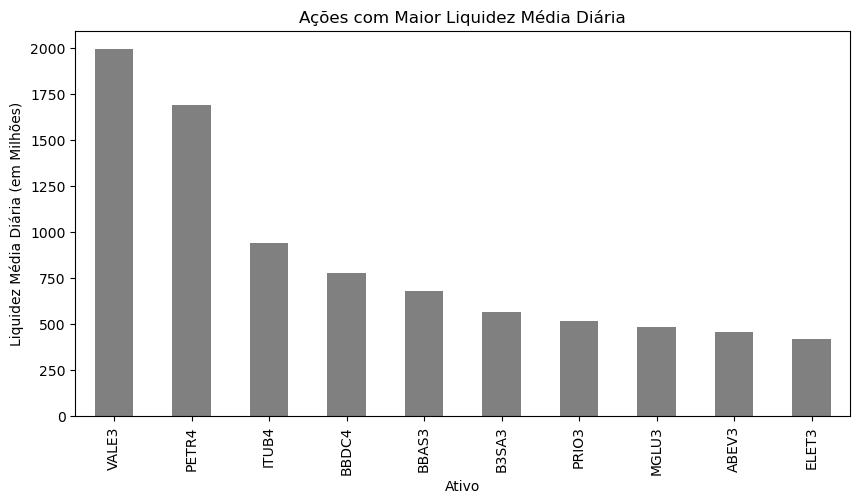

In [ ]:
df3.plot(kind='bar', x = 'TICKER', y = ' LIQUIDEZ MEDIA DIARIA',
        figsize=(10,5), legend=False,
        xlabel = 'Ativo', ylabel = 'Liquidez Média Diária (em Milhões)', 
         title = 'Ações com Maior Liquidez Média Diária',
        color = 'gray')
plt.savefig('../Saida/graph1.png')
plt.show()

In [ ]:
df3

,TICKER,LIQUIDEZ MEDIA DIARIA
0,VALE3,1994.020
1,PETR4,1692.253
2,ITUB4,940.448
3,BBDC4,776.838
4,BBAS3,681.094
5,B3SA3,566.897
6,PRIO3,513.733
7,MGLU3,481.465
8,ABEV3,453.966
9,ELET3,417.111
